In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/seattle/listings.csv
/kaggle/input/seattle/calendar.csv
/kaggle/input/seattle/reviews.csv


In [5]:
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
listings_df = pd.read_csv('/kaggle/input/seattle/listings.csv')
calendar_df = pd.read_csv('/kaggle/input/seattle/calendar.csv')
reviews_df = pd.read_csv('/kaggle/input/seattle/reviews.csv')

Questions to find answers for:

1. Which neighborhood has high listing prices?
2. What time of the year is the busiest?
3. What type of listings have high listing prices?

In [3]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [4]:
listings_df['neighbourhood']

0        Queen Anne
1        Queen Anne
2        Queen Anne
3        Queen Anne
4        Queen Anne
           ...     
3813        Fremont
3814    Portage Bay
3815            NaN
3816            NaN
3817     Queen Anne
Name: neighbourhood, Length: 3818, dtype: object

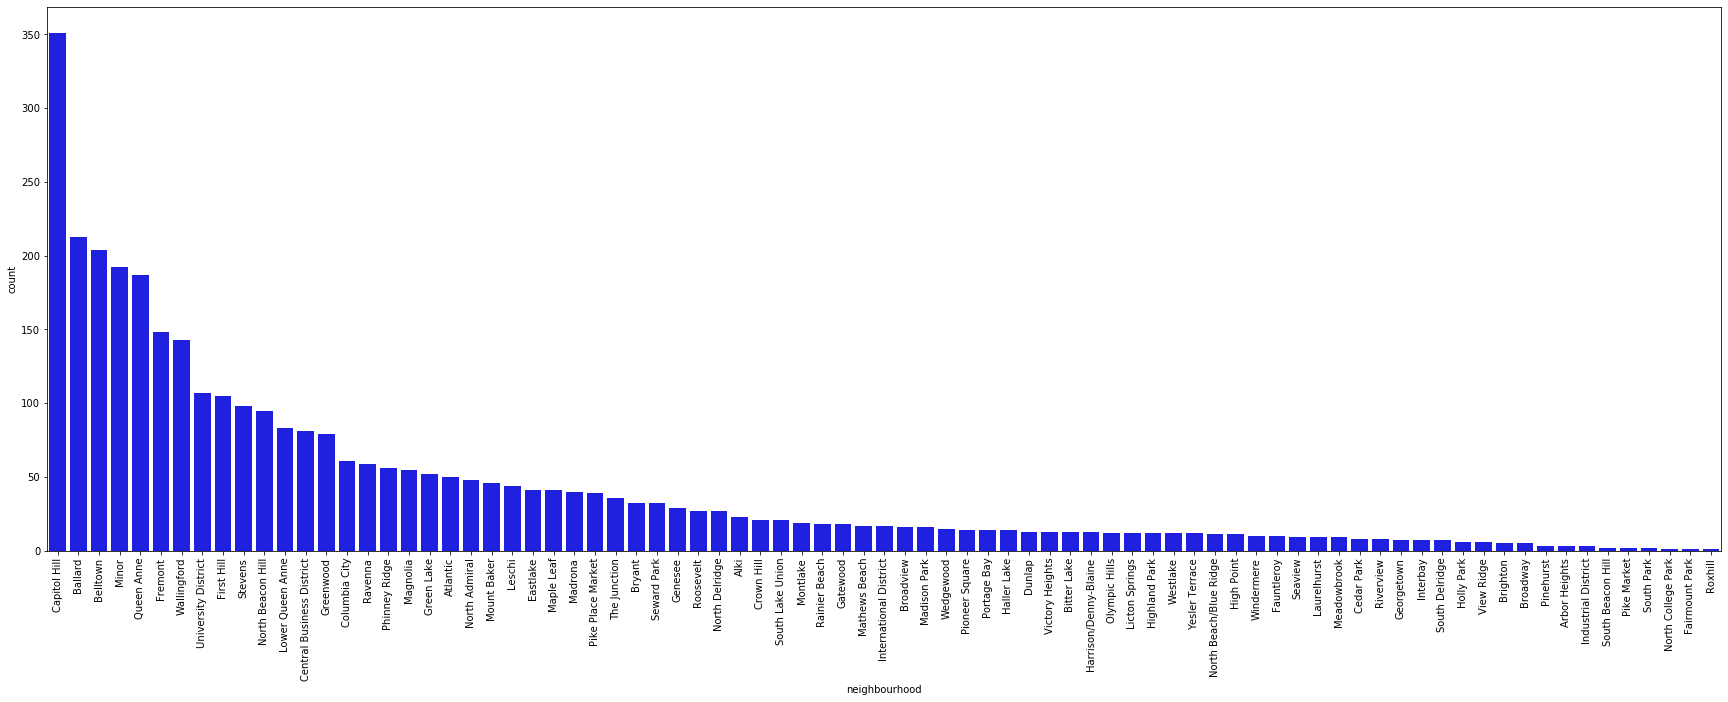

In [14]:
plt.figure(figsize=(30,10))
sb.countplot(listings_df['neighbourhood'],order=listings_df['neighbourhood'].value_counts().index,color='blue')
plt.xticks(rotation=90)
plt.show()

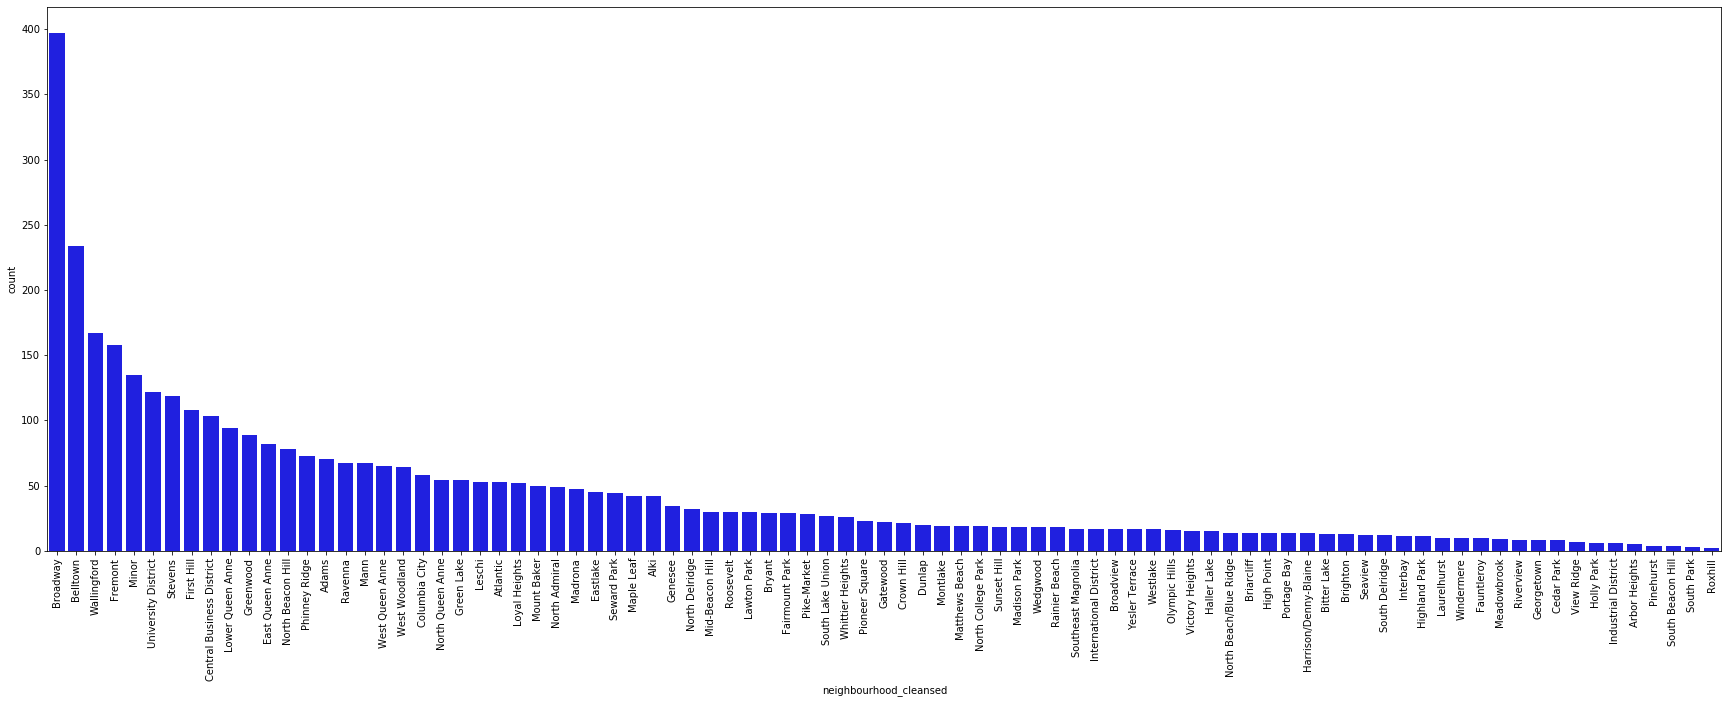

In [15]:
plt.figure(figsize=(30,10))
sb.countplot(listings_df['neighbourhood_cleansed'],order=listings_df['neighbourhood_cleansed'].value_counts().index,color='blue')
plt.xticks(rotation=90)
plt.show()

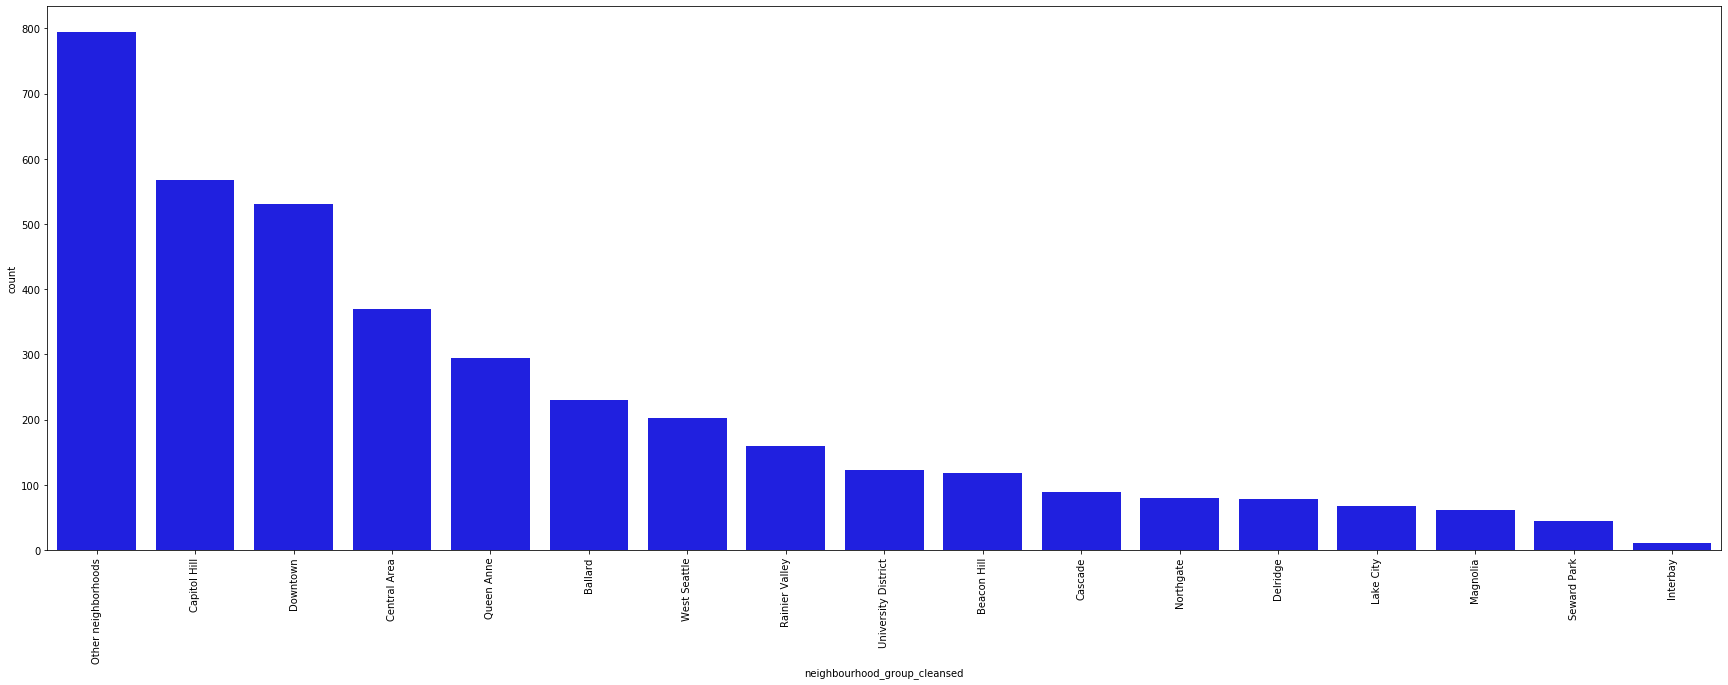

In [16]:
plt.figure(figsize=(30,10))
sb.countplot(listings_df['neighbourhood_group_cleansed'],order=listings_df['neighbourhood_group_cleansed'].value_counts().index,color='blue')
plt.xticks(rotation=90)
plt.show()

In [29]:
listings_df['price'] = listings_df['price'].apply(lambda price:price.split('$')[1])

In [34]:
float(listings_df['price'].iloc[0])

85.0

In [36]:
listings_df['price'] = listings_df['price'].apply(lambda price:''.join(price.split(',')))

In [37]:
listings_df['price'] = listings_df['price'].apply(lambda price:float(price))

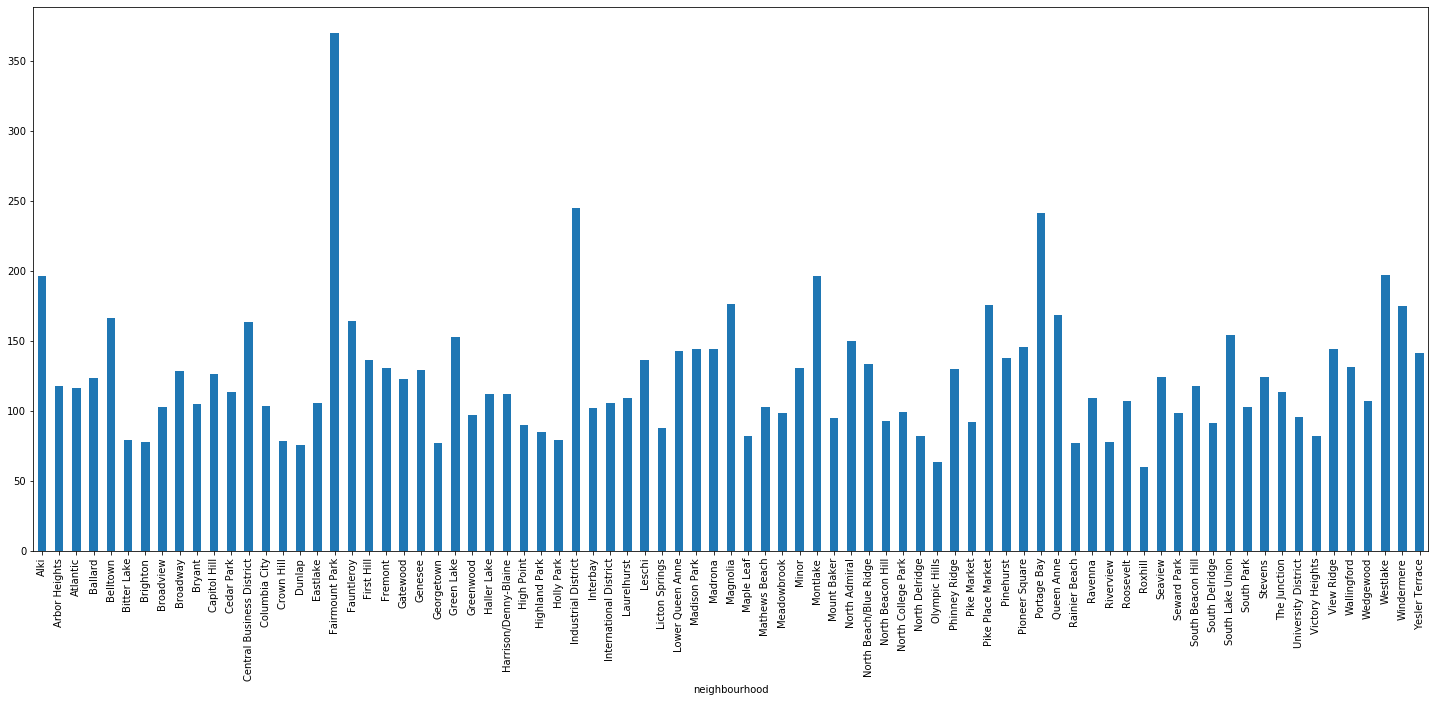

In [41]:
plt.figure(figsize=(25,10))
listings_df.groupby(['neighbourhood']).mean()['price'].plot(kind='bar')
plt.show()

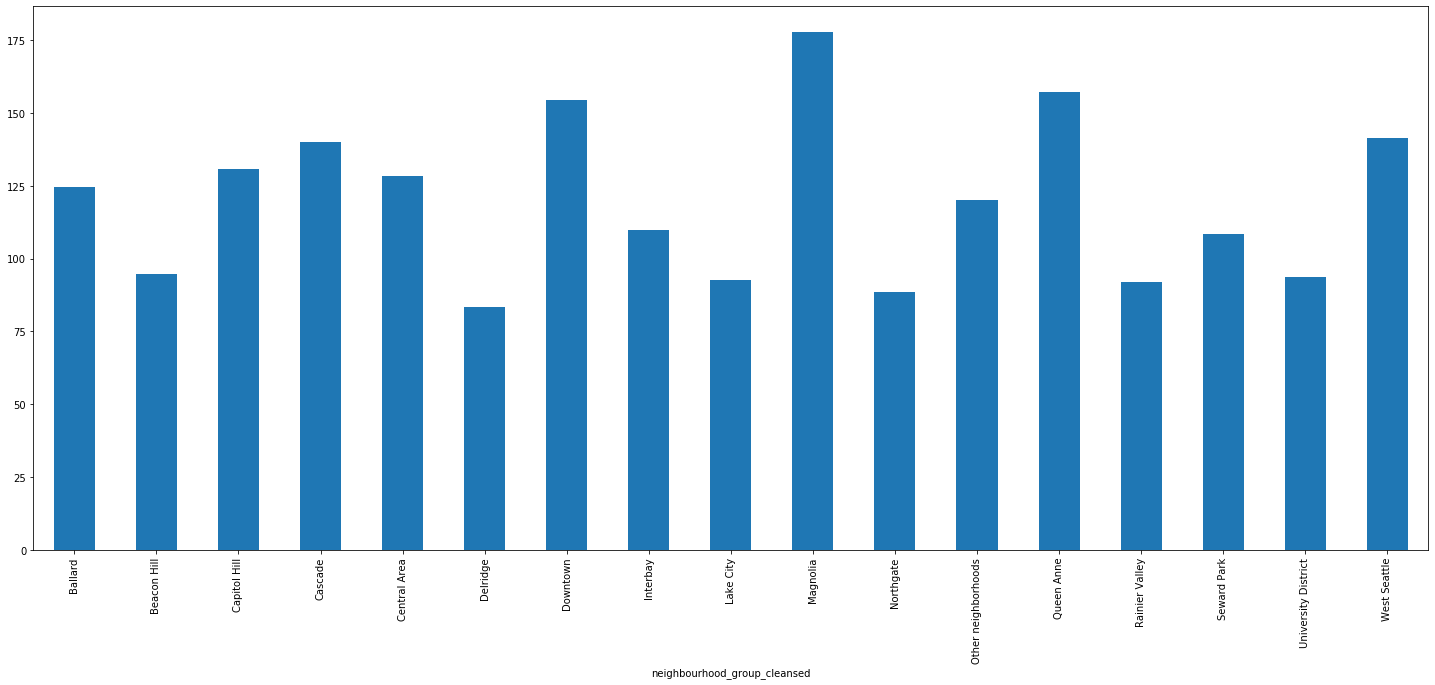

In [43]:
plt.figure(figsize=(25,10))
listings_df.groupby(['neighbourhood_group_cleansed']).mean()['price'].plot(kind='bar')
plt.show()

In [44]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


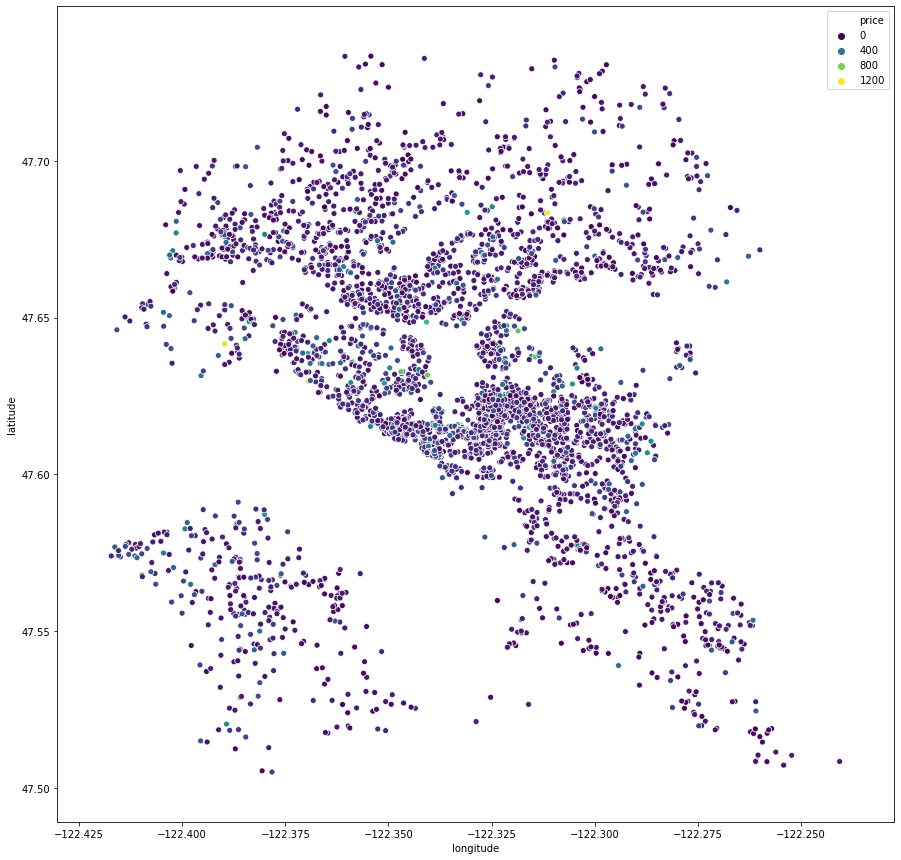

In [53]:
plt.figure(figsize=(15,15))
sb.scatterplot(x='longitude',y='latitude',data=listings_df,palette='viridis',size='price')
plt.show()